# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:

# Mengambil data melalui URL
url = 'https://docs.google.com/spreadsheets/d/1RJBA64MVtFb78imp8jGDFXbfK9Ku5275/edit?usp=sharing&ouid=118304671353395650735&rtpof=true&sd=true'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_excel(url)
df

,Kabupaten/Kota,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),IPM,Pertumbuhan IPM (%)
0,Kepulauan Seribu,74.89,12.66,9.03,13.523,75.91,0.76
1,Kota Jakarta Selatan,76.02,13.66,11.75,24.975,86.71,0.98
2,Kota Jakarta Timur,75.37,14.06,11.88,18.712,84.26,0.79
3,Kota Jakarta Pusat,76.34,13.29,11.54,18.202,83.29,0.47
4,Kota Jakarta Barat,75.81,12.87,11.23,21.709,83.85,0.50
...,...,...,...,...,...,...,...
114,Serang,74.62,12.86,7.79,11.320,72.63,0.89
115,Kota Tangeranng,75.30,13.89,10.91,15.377,80.98,0.67
116,Kota Cilegon,74.81,13.21,10.38,13.663,78.24,0.72
117,Kota Serang,75.13,12.82,8.91,14.008,76.43,0.55


In [3]:
data = df.drop(columns=['IPM', 'Pertumbuhan IPM (%)'])
data

,Kabupaten/Kota,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah)
0,Kepulauan Seribu,74.89,12.66,9.03,13.523
1,Kota Jakarta Selatan,76.02,13.66,11.75,24.975
2,Kota Jakarta Timur,75.37,14.06,11.88,18.712
3,Kota Jakarta Pusat,76.34,13.29,11.54,18.202
4,Kota Jakarta Barat,75.81,12.87,11.23,21.709
...,...,...,...,...,...
114,Serang,74.62,12.86,7.79,11.320
115,Kota Tangeranng,75.30,13.89,10.91,15.377
116,Kota Cilegon,74.81,13.21,10.38,13.663
117,Kota Serang,75.13,12.82,8.91,14.008


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kabupaten/Kota             119 non-null    object 
 1   UHH (tahun)                119 non-null    float64
 2   HLS (tahun)                119 non-null    float64
 3   RLS (tahun)                119 non-null    float64
 4   Pengeluaran (ribu rupiah)  119 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


# Data Preparation

## Mengubah Tipe Data

In [5]:
data['Pengeluaran (ribu rupiah)'] = data['Pengeluaran (ribu rupiah)'].astype(object)

In [6]:
data['Pengeluaran (ribu rupiah)'] = data['Pengeluaran (ribu rupiah)'].astype(str).str.replace('.', '')

In [7]:
data['Pengeluaran (ribu rupiah)'] = data['Pengeluaran (ribu rupiah)'].astype(int)

In [8]:
data

,Kabupaten/Kota,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah)
0,Kepulauan Seribu,74.89,12.66,9.03,13523
1,Kota Jakarta Selatan,76.02,13.66,11.75,24975
2,Kota Jakarta Timur,75.37,14.06,11.88,18712
3,Kota Jakarta Pusat,76.34,13.29,11.54,18202
4,Kota Jakarta Barat,75.81,12.87,11.23,21709
...,...,...,...,...,...
114,Serang,74.62,12.86,7.79,1132
115,Kota Tangeranng,75.30,13.89,10.91,15377
116,Kota Cilegon,74.81,13.21,10.38,13663
117,Kota Serang,75.13,12.82,8.91,14008


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kabupaten/Kota             119 non-null    object 
 1   UHH (tahun)                119 non-null    float64
 2   HLS (tahun)                119 non-null    float64
 3   RLS (tahun)                119 non-null    float64
 4   Pengeluaran (ribu rupiah)  119 non-null    int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 4.3+ KB


## Missing Value

In [10]:
#Missing Value

data.isnull().sum()

Kabupaten/Kota               0
UHH (tahun)                  0
HLS (tahun)                  0
RLS (tahun)                  0
Pengeluaran (ribu rupiah)    0
dtype: int64

## Data Duplicate

In [11]:
#Check Data Duplicate

data_dup = data.copy()

data_dup.drop_duplicates(subset=None, inplace=True)
data_dup.shape

(119, 5)

In [12]:
data.shape

(119, 5)

# Exploratory Data Analysis

In [13]:
data

,Kabupaten/Kota,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah)
0,Kepulauan Seribu,74.89,12.66,9.03,13523
1,Kota Jakarta Selatan,76.02,13.66,11.75,24975
2,Kota Jakarta Timur,75.37,14.06,11.88,18712
3,Kota Jakarta Pusat,76.34,13.29,11.54,18202
4,Kota Jakarta Barat,75.81,12.87,11.23,21709
...,...,...,...,...,...
114,Serang,74.62,12.86,7.79,1132
115,Kota Tangeranng,75.30,13.89,10.91,15377
116,Kota Cilegon,74.81,13.21,10.38,13663
117,Kota Serang,75.13,12.82,8.91,14008


In [14]:
data.describe()

,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah)
count,119.000000,119.000000,119.000000,119.000000
mean,75.042353,13.290168,8.696387,10916.126050
std,0.948934,1.028200,1.623969,4773.829695
min,73.190000,11.800000,5.070000,913.000000
25%,74.595000,12.615000,7.485000,9909.000000
50%,74.890000,13.170000,8.230000,11356.000000
75%,75.370000,13.730000,9.845000,12983.500000
max,77.930000,17.620000,12.110000,24975.000000


## Data Visualization

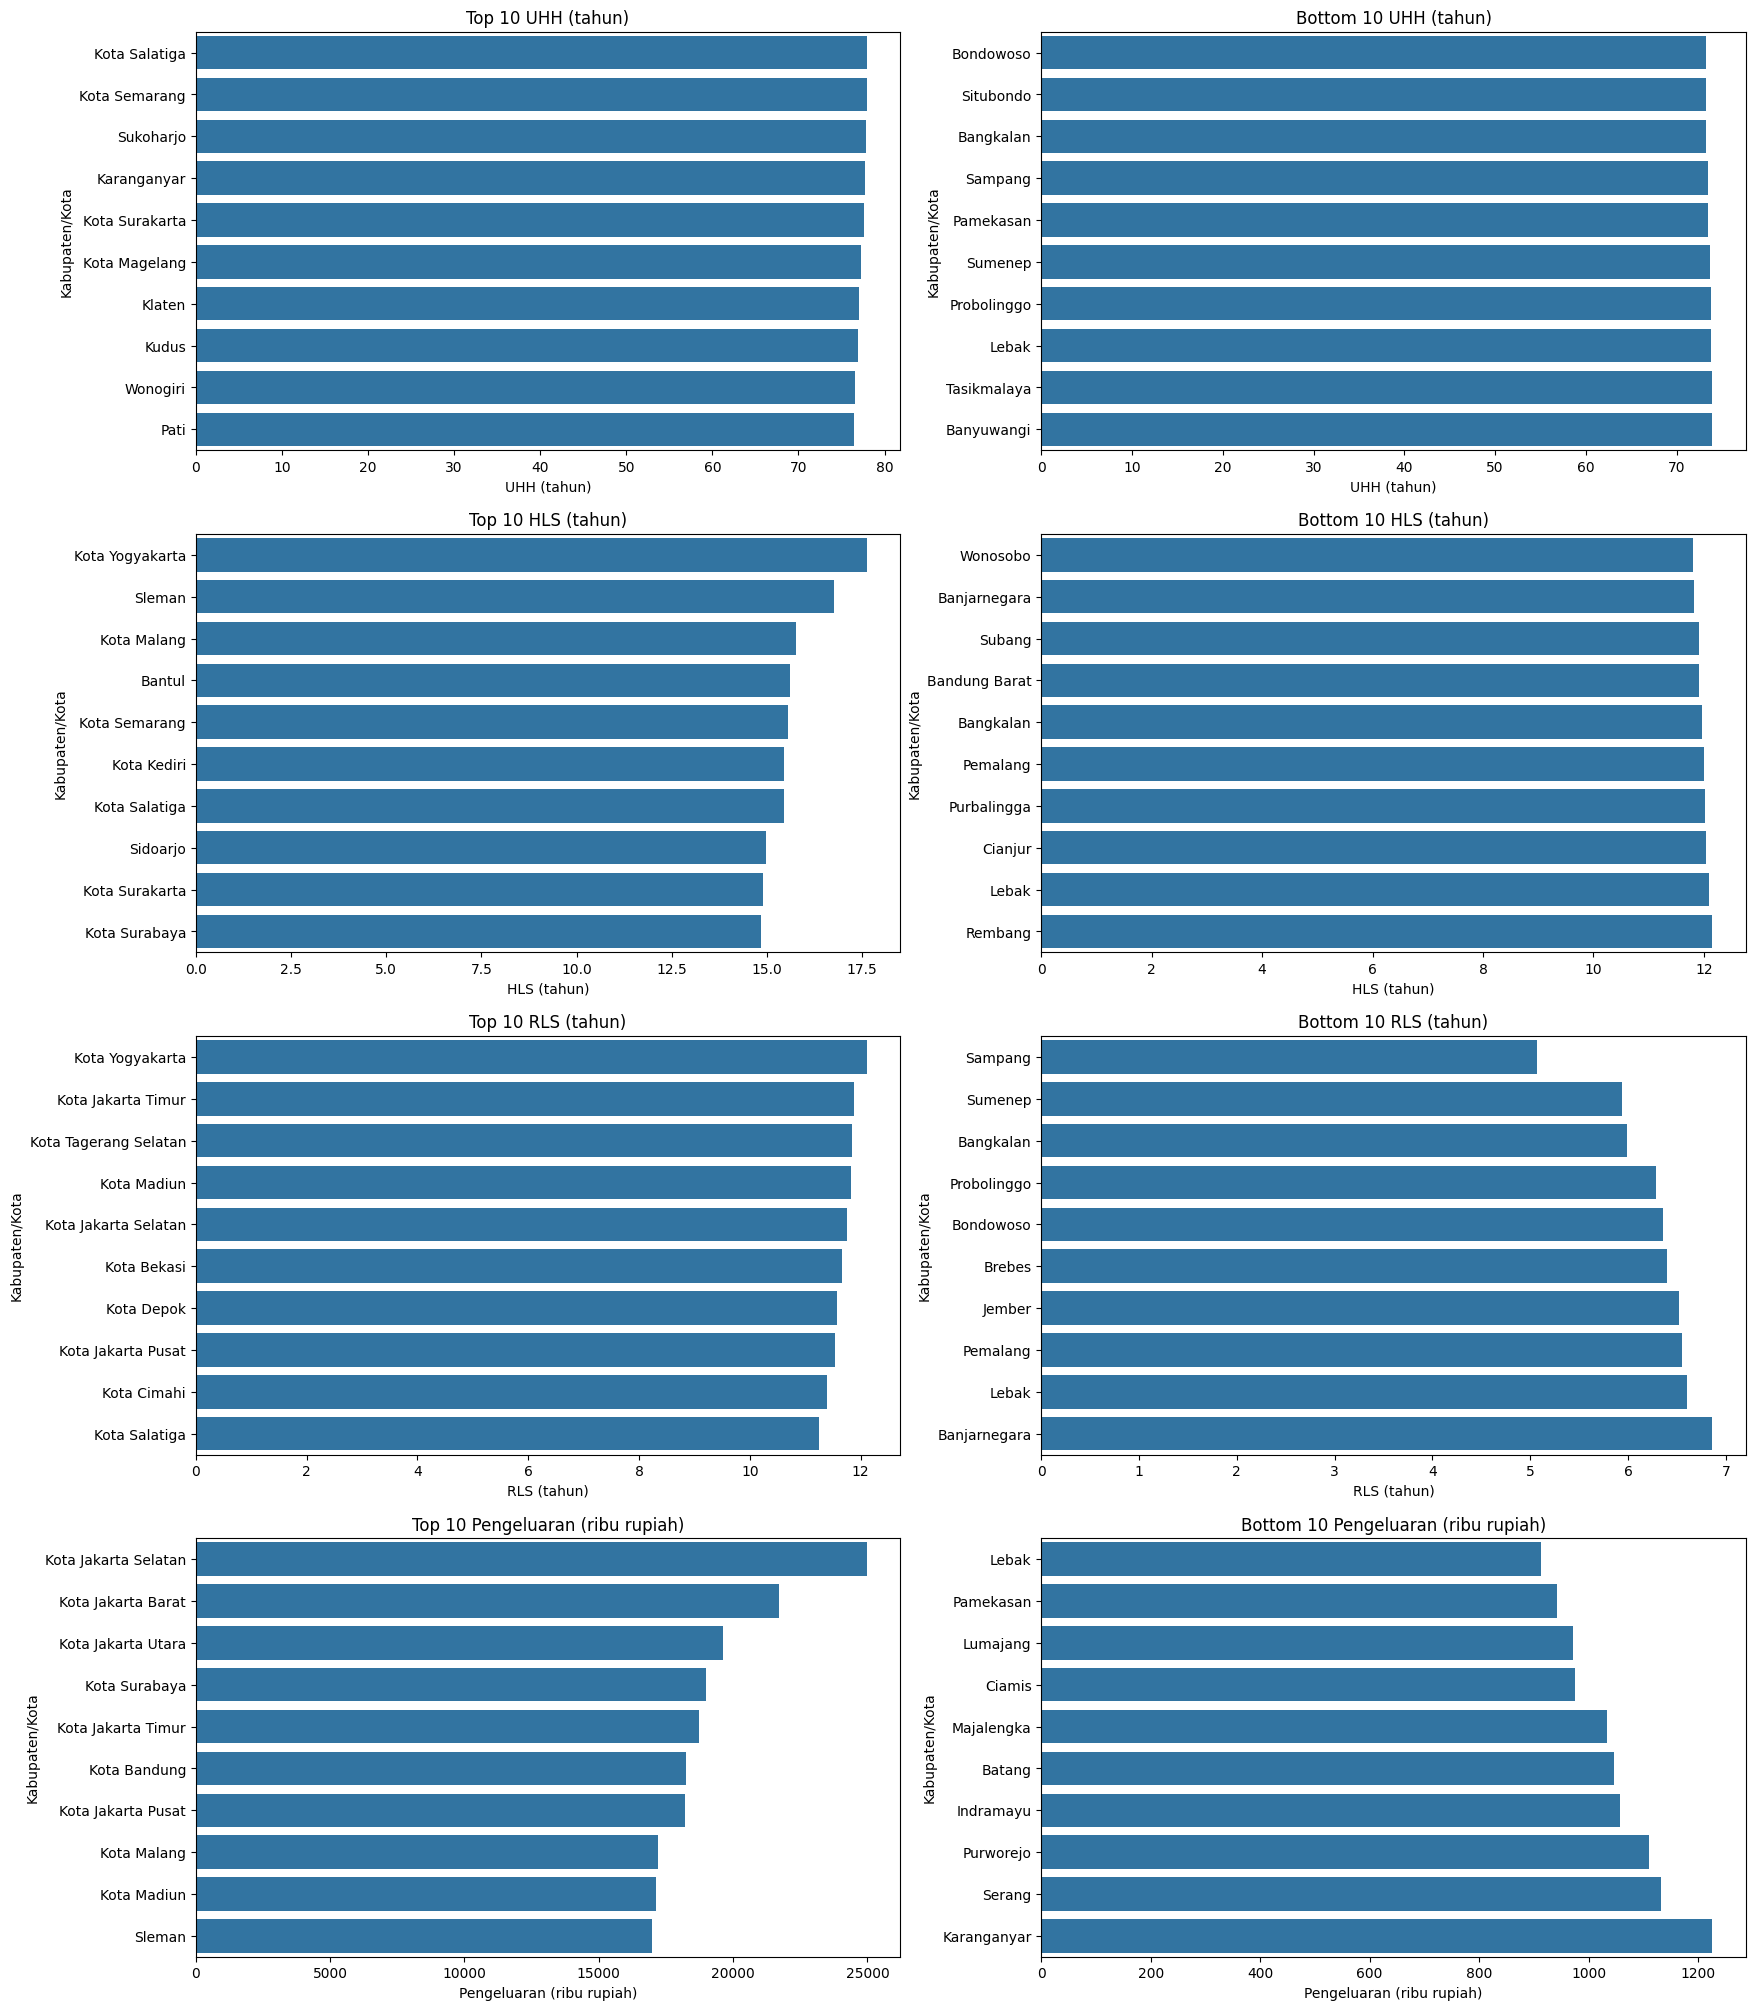

<Figure size 500x500 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


# Mengambil 10 nilai tertinggi dari kolom 'UHH'
top_10_uhh = data_dup.nlargest(10, "UHH (tahun)")
top_10_hls = data_dup.nlargest(10, "HLS (tahun)")
top_10_rls = data_dup.nlargest(10, "RLS (tahun)")
top_10_pengeluaran = data_dup.nlargest(10, "Pengeluaran (ribu rupiah)")

# Mengambil 10 nilai terendah dari kolom 'UHH'
bottom_10_uhh = data.nsmallest(10, 'UHH (tahun)')
bottom_10_hls = data.nsmallest(10, "HLS (tahun)")
bottom_10_rls = data.nsmallest(10, "RLS (tahun)")
bottom_10_pengeluaran = data.nsmallest(10, "Pengeluaran (ribu rupiah)")

# Membuat plot top dan bottom untuk setiap variabel dalam satu figur
fig, axs = plt.subplots(4, 2, figsize=(20, 25))

# Top 10 UHH
sns.barplot(data=top_10_uhh, y="Kabupaten/Kota", x="UHH (tahun)", ax=axs[0, 0])
axs[0, 0].set_title('Top 10 UHH (tahun)')

# Bottom 10 UHH
sns.barplot(data=bottom_10_uhh, y="Kabupaten/Kota", x="UHH (tahun)", ax=axs[0, 1])
axs[0, 1].set_title('Bottom 10 UHH (tahun)')

# Top 10 HLS
sns.barplot(data=top_10_hls, y="Kabupaten/Kota", x="HLS (tahun)", ax=axs[1, 0])
axs[1, 0].set_title('Top 10 HLS (tahun)')

# Bottom 10 HLS
sns.barplot(data=bottom_10_hls, y="Kabupaten/Kota", x="HLS (tahun)", ax=axs[1, 1])
axs[1, 1].set_title('Bottom 10 HLS (tahun)')

# Top 10 RLS
sns.barplot(data=top_10_rls, y="Kabupaten/Kota", x="RLS (tahun)", ax=axs[2, 0])
axs[2, 0].set_title('Top 10 RLS (tahun)')

# Bottom 10 RLS
sns.barplot(data=bottom_10_rls, y="Kabupaten/Kota", x="RLS (tahun)", ax=axs[2, 1])
axs[2, 1].set_title('Bottom 10 RLS (tahun)')

# Top 10 Pengeluaran
sns.barplot(data=top_10_pengeluaran, y="Kabupaten/Kota", x="Pengeluaran (ribu rupiah)", ax=axs[3, 0])
axs[3, 0].set_title('Top 10 Pengeluaran (ribu rupiah)')

# Bottom 10 Pengeluaran
sns.barplot(data=bottom_10_pengeluaran, y="Kabupaten/Kota", x="Pengeluaran (ribu rupiah)", ax=axs[3, 1])
axs[3, 1].set_title('Bottom 10 Pengeluaran (ribu rupiah)')

# Menyesuaikan layout
plt.figure(figsize=(5,5))
plt.show()


# K-Means

## Building and Evaluate Model

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette = [0]
X = data[['UHH (tahun)', 'HLS (tahun)', 'RLS (tahun)', 'Pengeluaran (ribu rupiah)']].copy()
best_model = None

for i in range(2, 11):
    model = KMeans(n_init=10, n_clusters=i, random_state=42)
    score = silhouette_score(X, model.fit_predict(X))

    if max(silhouette) < score:
        best_model = model

    silhouette.append(score)
    print(f'Silhouette Score dengan n: {i} adalah {score}')


result = best_model.fit(X)
print(f'Best cluster: {result.n_clusters}, Silhouette Coefficient: {max(silhouette)}')

Silhouette Score dengan n: 2 adalah 0.7724934174072516
Silhouette Score dengan n: 3 adalah 0.737058642749587
Silhouette Score dengan n: 4 adalah 0.6207431527888152
Silhouette Score dengan n: 5 adalah 0.6270641237443327
Silhouette Score dengan n: 6 adalah 0.6243548889300367
Silhouette Score dengan n: 7 adalah 0.6259245767482498
Silhouette Score dengan n: 8 adalah 0.6235393968982477
Silhouette Score dengan n: 9 adalah 0.6187974337101593
Silhouette Score dengan n: 10 adalah 0.616092034306639
Best cluster: 2, Silhouette Coefficient: 0.7724934174072516


## Final Model

In [17]:
model = KMeans(n_init=10, n_clusters=3, random_state=42)
result = model.fit(X)

df_cluster = X.copy()
df_cluster['Cluster'] = result.predict(X)
display(df_cluster)

pd.DataFrame(result.cluster_centers_, columns=df_cluster.columns[:-1])

,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),Cluster
0,74.89,12.66,9.03,13523,0
1,76.02,13.66,11.75,24975,2
2,75.37,14.06,11.88,18712,2
3,76.34,13.29,11.54,18202,2
4,75.81,12.87,11.23,21709,2
...,...,...,...,...,...
114,74.62,12.86,7.79,1132,1
115,75.30,13.89,10.91,15377,2
116,74.81,13.21,10.38,13663,0
117,75.13,12.82,8.91,14008,0


,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah)
0,74.900000,13.004535,8.221395,11508.058140
1,75.315882,13.722941,8.734706,1258.235294
2,75.516875,14.365625,11.208750,17996.000000


In [18]:
df_kluster = pd.concat([data['Kabupaten/Kota'], df_cluster], axis=1)
df_kluster

,Kabupaten/Kota,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),Cluster
0,Kepulauan Seribu,74.89,12.66,9.03,13523,0
1,Kota Jakarta Selatan,76.02,13.66,11.75,24975,2
2,Kota Jakarta Timur,75.37,14.06,11.88,18712,2
3,Kota Jakarta Pusat,76.34,13.29,11.54,18202,2
4,Kota Jakarta Barat,75.81,12.87,11.23,21709,2
...,...,...,...,...,...,...
114,Serang,74.62,12.86,7.79,1132,1
115,Kota Tangeranng,75.30,13.89,10.91,15377,2
116,Kota Cilegon,74.81,13.21,10.38,13663,0
117,Kota Serang,75.13,12.82,8.91,14008,0


In [19]:
# Tampilkan data per kluster
for cluster_id, cluster_data in df_kluster.groupby('Cluster'):
    print(f"\nData untuk Kluster {cluster_id+1} (jumlah: {len(cluster_data)}):")
    print(cluster_data['Kabupaten/Kota'].values)


Data untuk Kluster 1 (jumlah: 86):
['Kepulauan Seribu' 'Bogor' 'Sukabumi' 'Cianjur' 'Bandung' 'Garut'
 'Tasikmalaya' 'Kuningan' 'Cirebon' 'Sumedang' 'Subang' 'Purwakarta'
 'Karawang' 'Bekasi' 'Bandung Barat' 'Pangandaran' 'Kota Bogor'
 'Kota Sukabumi' 'Kota Cirebon' 'Kota Cimahi' 'Kota Tasikmalaya'
 'Kota Banjar' 'Cilacap' 'Banyumas' 'Purbalingga' 'Banjarnegara' 'Kebumen'
 'Wonosobo' 'Magelang' 'Boyolali' 'Klaten' 'Sukoharjo' 'Wonogiri' 'Sragen'
 'Grobogan' 'Blora' 'Rembang' 'Pati' 'Kudus' 'Jepara' 'Demak' 'Semarang'
 'Temanggung' 'Kendal' 'Pekalongan' 'Pemalang' 'Tegal' 'Brebes'
 'Kota Magelang' 'Kota Pekalongan' 'Kota Tegal' 'Kulon Progo'
 'Gunung Kidul' 'Pacitan' 'Ponorogo' 'Trenggalek' 'Tulungagung' 'Blitar'
 'Kediri' 'Malang' 'Jember' 'Bondowoso' 'Situbondo' 'Probolinggo'
 'Pasuruan' 'Mojokerto' 'Jombang' 'Nganjuk' 'Madiun' 'Magetan' 'Ngawi'
 'Bojonegoro' 'Tuban' 'Lamongan' 'Bangkalan' 'Sampang' 'Sumenep'
 'Kota Kediri' 'Kota Blitar' 'Kota Probolinggo' 'Kota Mojokerto'
 'Kota Bat

## Model Visualization

<Figure size 800x800 with 0 Axes>

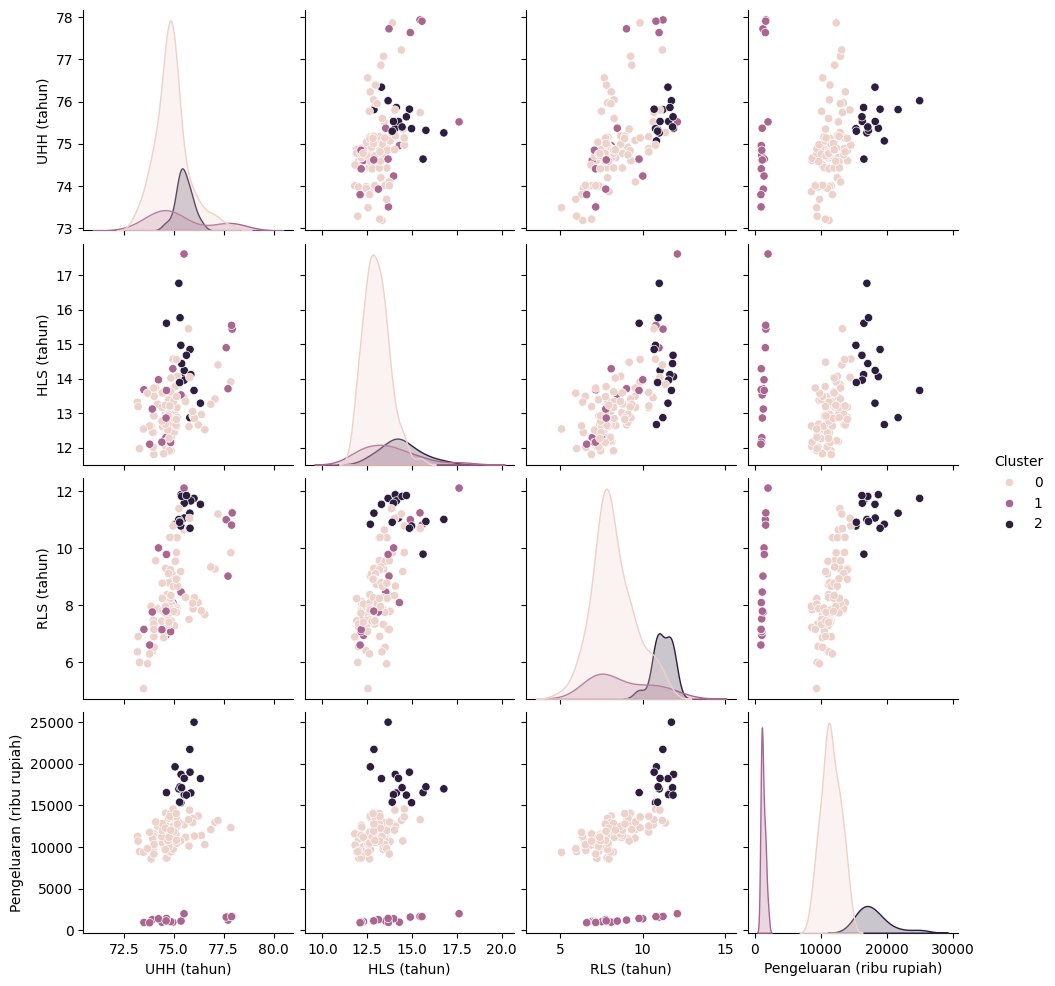

In [20]:
plt.figure(figsize=(8, 8))

sns.pairplot(df_cluster, hue='Cluster');

# Mean Shift

## Building Model

In [21]:
from sklearn.cluster import MeanShift

clustering = MeanShift().fit(X)
cluster_label = clustering.predict(X)
cluster_label

df_cluster_ms = X.copy()
df_cluster_ms['Label Cluster'] = cluster_label
display(df_cluster_ms)

pd.DataFrame(result.cluster_centers_, columns=df_cluster_ms.columns[:-1])

,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),Label Cluster
0,74.89,12.66,9.03,13523,0
1,76.02,13.66,11.75,24975,2
2,75.37,14.06,11.88,18712,2
3,76.34,13.29,11.54,18202,0
4,75.81,12.87,11.23,21709,2
...,...,...,...,...,...
114,74.62,12.86,7.79,1132,1
115,75.30,13.89,10.91,15377,0
116,74.81,13.21,10.38,13663,0
117,75.13,12.82,8.91,14008,0


,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah)
0,74.900000,13.004535,8.221395,11508.058140
1,75.315882,13.722941,8.734706,1258.235294
2,75.516875,14.365625,11.208750,17996.000000


## Evaluate Model

In [45]:
silhouette = [0]
X = data[['UHH (tahun)', 'HLS (tahun)', 'RLS (tahun)', 'Pengeluaran (ribu rupiah)']].copy()
best_model = None

for i in range(10):
    model = MeanShift(max_iter=(i+1))
    score = silhouette_score(X, model.fit_predict(X))

    if max(silhouette) < score:
        best_model = model

    silhouette.append(score)
    print(f'Silhouette Score dengan max_iter: {(i+1)} adalah {score}')


result = best_model.fit(X)
print(f'Best cluster: {len(result.cluster_centers_)}, Silhouette Coefficient: {max(silhouette)}')

Silhouette Score dengan max_iter: 1 adalah 0.5652259041051451
Silhouette Score dengan max_iter: 2 adalah 0.6811049415241296
Silhouette Score dengan max_iter: 3 adalah 0.657068523523744
Silhouette Score dengan max_iter: 4 adalah 0.6413354292745587
Silhouette Score dengan max_iter: 5 adalah 0.6619594070750122
Silhouette Score dengan max_iter: 6 adalah 0.6413354292745587
Silhouette Score dengan max_iter: 7 adalah 0.6413354292745587
Silhouette Score dengan max_iter: 8 adalah 0.6413354292745587
Silhouette Score dengan max_iter: 9 adalah 0.6993618569873024
Silhouette Score dengan max_iter: 10 adalah 0.697787909970172
Best cluster: 3, Silhouette Coefficient: 0.6993618569873024


## Analisis Model

In [23]:
df_kluster_ms = pd.concat([data['Kabupaten/Kota'], df_cluster_ms], axis=1)
df_kluster_ms

,Kabupaten/Kota,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),Label Cluster
0,Kepulauan Seribu,74.89,12.66,9.03,13523,0
1,Kota Jakarta Selatan,76.02,13.66,11.75,24975,2
2,Kota Jakarta Timur,75.37,14.06,11.88,18712,2
3,Kota Jakarta Pusat,76.34,13.29,11.54,18202,0
4,Kota Jakarta Barat,75.81,12.87,11.23,21709,2
...,...,...,...,...,...,...
114,Serang,74.62,12.86,7.79,1132,1
115,Kota Tangeranng,75.30,13.89,10.91,15377,0
116,Kota Cilegon,74.81,13.21,10.38,13663,0
117,Kota Serang,75.13,12.82,8.91,14008,0


In [24]:
# Tampilkan data per kluster
for cluster_id, cluster_data in df_kluster_ms.groupby('Label Cluster'):
    print(f"\nData untuk Kluster {cluster_id+1} (jumlah: {len(cluster_data)}):")
    print(cluster_data['Kabupaten/Kota'].values)


Data untuk Kluster 1 (jumlah: 96):
['Kepulauan Seribu' 'Kota Jakarta Pusat' 'Bogor' 'Sukabumi' 'Cianjur'
 'Bandung' 'Garut' 'Tasikmalaya' 'Kuningan' 'Cirebon' 'Sumedang' 'Subang'
 'Purwakarta' 'Karawang' 'Bekasi' 'Bandung Barat' 'Pangandaran'
 'Kota Bogor' 'Kota Sukabumi' 'Kota Cirebon' 'Kota Bekasi' 'Kota Depok'
 'Kota Cimahi' 'Kota Tasikmalaya' 'Kota Banjar' 'Cilacap' 'Banyumas'
 'Purbalingga' 'Banjarnegara' 'Kebumen' 'Wonosobo' 'Magelang' 'Boyolali'
 'Klaten' 'Sukoharjo' 'Wonogiri' 'Sragen' 'Grobogan' 'Blora' 'Rembang'
 'Pati' 'Kudus' 'Jepara' 'Demak' 'Semarang' 'Temanggung' 'Kendal'
 'Pekalongan' 'Pemalang' 'Tegal' 'Brebes' 'Kota Magelang'
 'Kota Pekalongan' 'Kota Tegal' 'Kulon Progo' 'Bantul' 'Gunung Kidul'
 'Sleman' 'Pacitan' 'Ponorogo' 'Trenggalek' 'Tulungagung' 'Blitar'
 'Kediri' 'Malang' 'Jember' 'Bondowoso' 'Situbondo' 'Probolinggo'
 'Pasuruan' 'Sidoarjo' 'Mojokerto' 'Jombang' 'Nganjuk' 'Madiun' 'Magetan'
 'Ngawi' 'Bojonegoro' 'Tuban' 'Lamongan' 'Bangkalan' 'Sampang' 'Sumene

## Model Visualization

<Figure size 800x800 with 0 Axes>

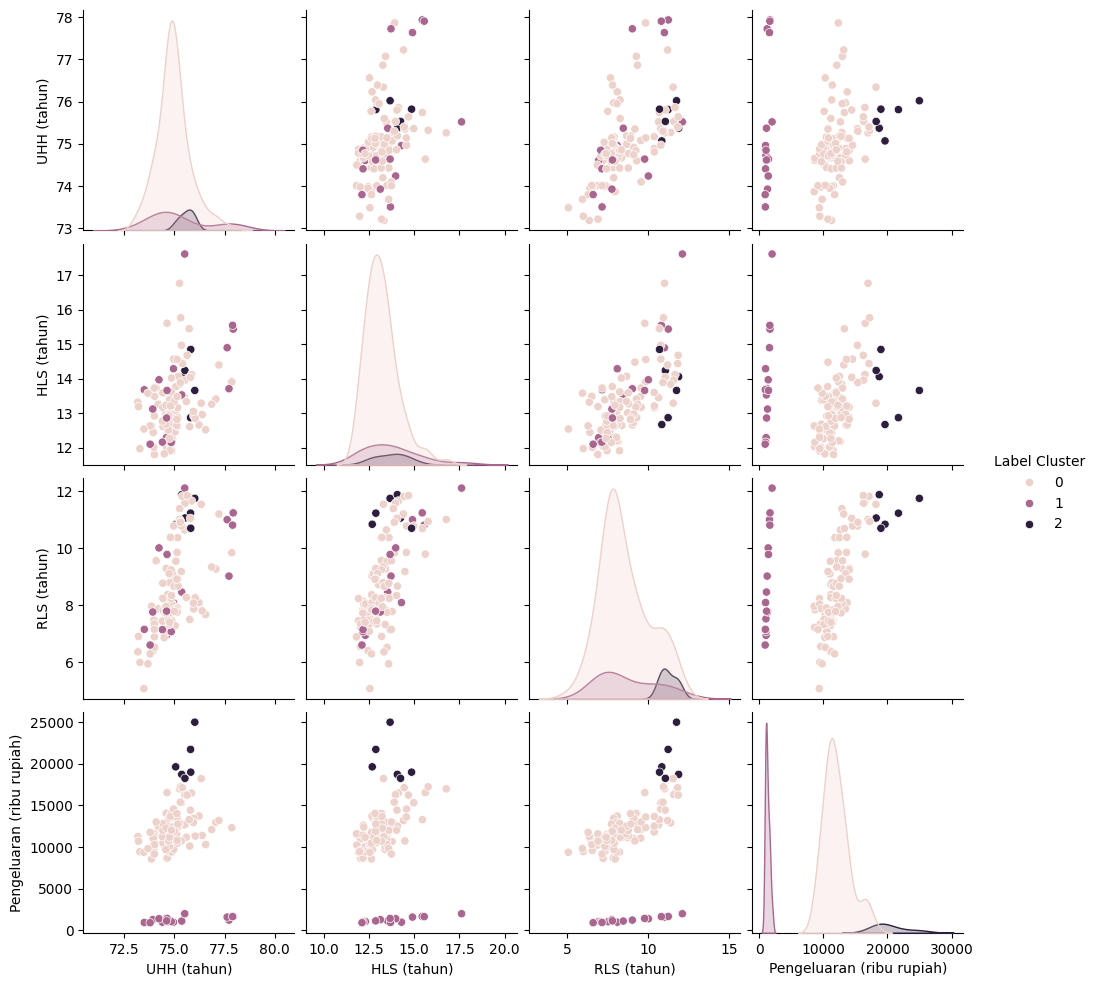

In [25]:
plt.figure(figsize=(8, 8))

sns.pairplot(df_cluster_ms, hue='Label Cluster');

# Comparing Model

In [26]:
# Menggabungkan kolom 'Cluster' dari df_cluster dan 'HLS (tahun)' dari df_cluster_ms
df_compare = pd.concat([df_cluster['Cluster'], df_cluster_ms['Label Cluster']], axis=1)

# Menambahkan data ke df_compare
df_compare_fix = pd.concat([data,df_compare], axis=1)
df_compare_fix


,Kabupaten/Kota,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),Cluster,Label Cluster
0,Kepulauan Seribu,74.89,12.66,9.03,13523,0,0
1,Kota Jakarta Selatan,76.02,13.66,11.75,24975,2,2
2,Kota Jakarta Timur,75.37,14.06,11.88,18712,2,2
3,Kota Jakarta Pusat,76.34,13.29,11.54,18202,2,0
4,Kota Jakarta Barat,75.81,12.87,11.23,21709,2,2
...,...,...,...,...,...,...,...
114,Serang,74.62,12.86,7.79,1132,1,1
115,Kota Tangeranng,75.30,13.89,10.91,15377,2,0
116,Kota Cilegon,74.81,13.21,10.38,13663,0,0
117,Kota Serang,75.13,12.82,8.91,14008,0,0


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

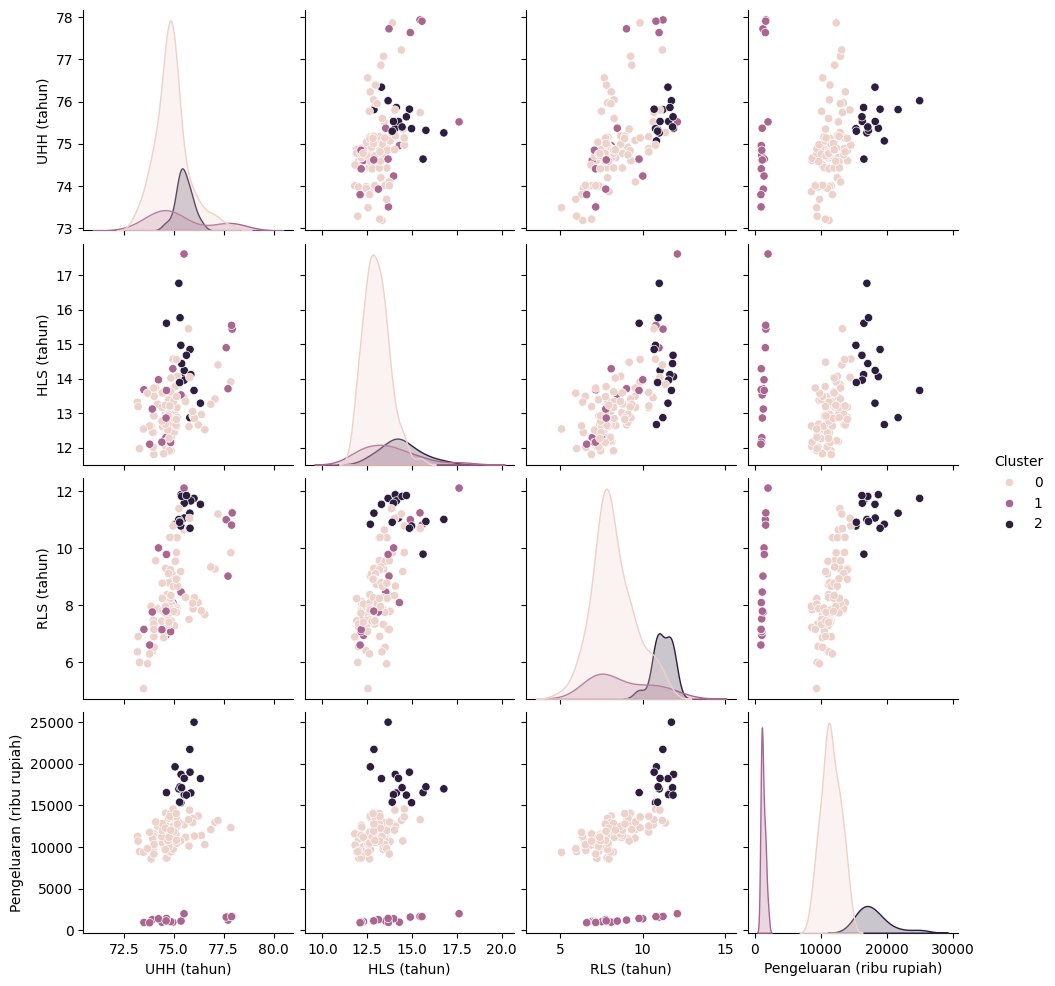

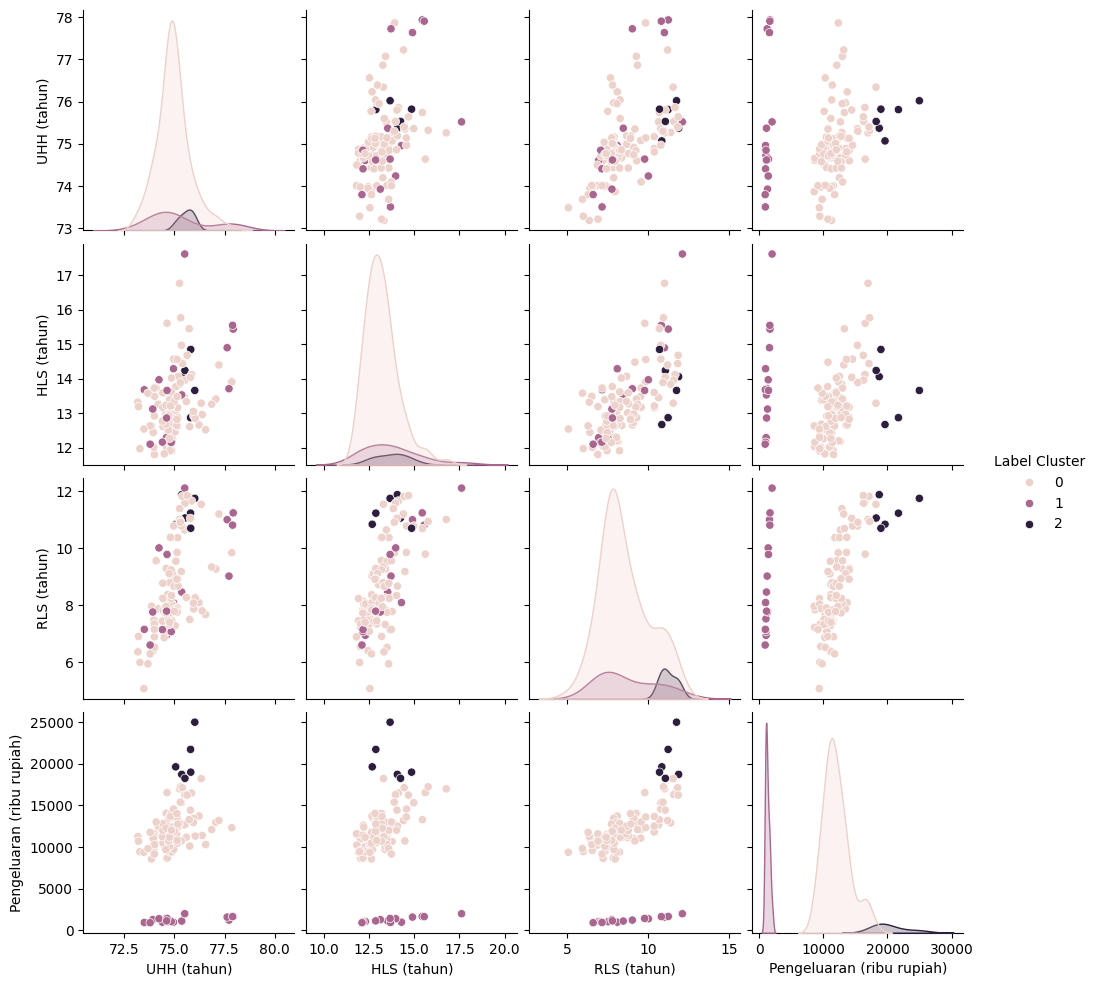

In [27]:
plt.figure(figsize=(8, 8))
plt.figure(figsize=(8, 8))

sns.pairplot(df_cluster, hue='Cluster');
sns.pairplot(df_cluster_ms, hue='Label Cluster');

# Map Visualization

## Install Library

In [28]:
#!pip install geopandas

## Read Data for Map Visualization

In [29]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt


#URL = "https://drive.google.com/file/d/10pc2LHmPreVEftFST_v9i4wcxiVBpqEk/view?usp=drive_link"
#response = requests.get(URL)

In [30]:
fp = "idn_admbnda_adm2_bps_20200401.shp"
map_df = gpd.read_file(fp, SHAPE_RESTORE_SHX=True)
map_df

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.360029,0.228968,Aceh Barat,ID1107,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ..."
1,1.963994,0.154136,Aceh Barat Daya,ID1112,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7..."
2,4.590182,0.236396,Aceh Besar,ID1108,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,3.287754,0.316161,Aceh Jaya,ID1116,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((95.58431 4.61495, 95.58379 4.6..."
4,4.448584,0.343038,Aceh Selatan,ID1103,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,3.508874,0.297509,Way Kanan,ID1807,None,None,None,Lampung,ID18,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((104.92793 -4.19234, 104.92823 -4.192..."
518,2.718402,0.157671,Wonogiri,ID3312,None,None,None,Jawa Tengah,ID33,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((111.18204 -7.71237, 111.18242 -7.712..."
519,1.828518,0.081405,Wonosobo,ID3307,None,None,None,Jawa Tengah,ID33,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194..."
520,5.771801,1.190892,Yahukimo,ID9416,None,None,None,Papua,ID94,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((139.96223 -3.60980, 139.96314 -3.609..."


<Axes: >

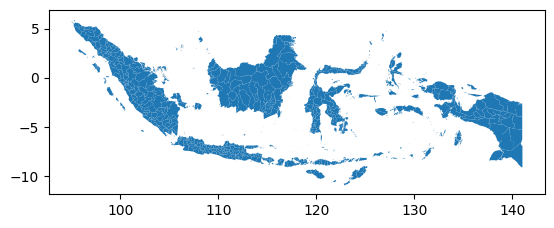

In [31]:
map_df.plot()

## Data Preparation

In [32]:
map_df.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM2_EN', 'ADM2_PCODE', 'ADM2_REF',
       'ADM2ALT1EN', 'ADM2ALT2EN', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN',
       'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry'],
      dtype='object')

In [33]:
unique_provinces = map_df['ADM1_EN'].unique()
unique_provinces

array(['Aceh', 'Sumatera Barat', 'Nusa Tenggara Timur', 'Sumatera Utara',
       'Papua', 'Bali', 'Kalimantan Selatan', 'Jawa Barat',
       'Sulawesi Tengah', 'Kepulauan Bangka Belitung', 'Jawa Timur',
       'Jawa Tengah', 'Sulawesi Selatan', 'Daerah Istimewa Yogyakarta',
       'Sumatera Selatan', 'Kalimantan Tengah', 'Jambi', 'Riau',
       'Kalimantan Barat', 'Bengkulu', 'Kalimantan Timur',
       'Nusa Tenggara Barat', 'Kepulauan Riau', 'Gorontalo',
       'Sulawesi Utara', 'Sulawesi Tenggara', 'Kalimantan Utara',
       'Maluku', 'Lampung', 'Papua Barat', 'Maluku Utara', 'Dki Jakarta',
       'Banten', 'Sulawesi Barat'], dtype=object)

In [34]:
# Filter DataFrame untuk hanya mempertahankan baris yang sesuai dengan provinsi di Pulau Jawa
provinsi_jawa = ['Dki Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Daerah Istimewa Yogyakarta', 'Banten']
map_df_jawa = map_df[map_df['ADM1_EN'].isin(provinsi_jawa)]
map_df_jawa_new = map_df_jawa.drop(columns=['ADM2_REF', 'ADM2ALT1EN', 'ADM2ALT2EN', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn', 'validTo'])
map_df_jawa_fix = map_df_jawa_new.rename(columns={'ADM2_EN': 'Kabupaten/Kota'})

# Menampilkan hasil
map_df_jawa_fix

,Shape_Leng,Shape_Area,Kabupaten/Kota,ADM2_PCODE,ADM1_EN,ADM1_PCODE,geometry
17,3.093005,0.143607,Bandung,ID3204,Jawa Barat,ID32,"POLYGON ((107.73309 -6.81400, 107.73354 -6.814..."
18,3.027563,0.104476,Bandung Barat,ID3217,Jawa Barat,ID32,"POLYGON ((107.40945 -6.68851, 107.40986 -6.688..."
26,1.902703,0.106667,Bangkalan,ID3526,Jawa Timur,ID35,"POLYGON ((113.03600 -6.87967, 113.03668 -6.879..."
29,2.326238,0.094114,Banjarnegara,ID3304,Jawa Tengah,ID33,"POLYGON ((109.80041 -7.17174, 109.80093 -7.172..."
31,1.832076,0.042281,Bantul,ID3402,Daerah Istimewa Yogyakarta,ID34,"POLYGON ((110.35102 -7.78036, 110.35094 -7.780..."
...,...,...,...,...,...,...,...
511,2.313531,0.094379,Tulungagung,ID3504,Jawa Timur,ID35,"MULTIPOLYGON (((111.86394 -8.27903, 111.86379 ..."
512,1.542493,0.004693,Waduk Cirata,ID3288,Jawa Barat,ID32,"POLYGON ((107.36784 -6.70070, 107.36693 -6.700..."
513,1.950834,0.002435,Wadung Kedungombo,ID3388,Jawa Tengah,ID33,"POLYGON ((110.82794 -7.24749, 110.82806 -7.247..."
518,2.718402,0.157671,Wonogiri,ID3312,Jawa Tengah,ID33,"POLYGON ((111.18204 -7.71237, 111.18242 -7.712..."


## K-Means

### Visualization

<Axes: >

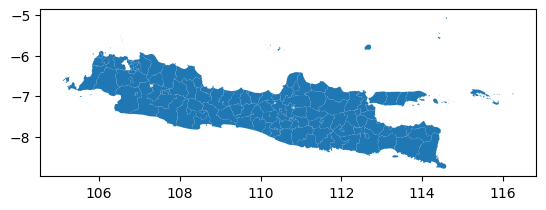

In [35]:
merged = map_df_jawa_fix.set_index('Kabupaten/Kota').join(df_kluster.set_index('Kabupaten/Kota'))
merged.dropna().plot()

In [36]:
merged

,Shape_Leng,Shape_Area,ADM2_PCODE,ADM1_EN,ADM1_PCODE,geometry,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),Cluster
Kabupaten/Kota,,,,,,,,,,,
Bandung,3.093005,0.143607,ID3204,Jawa Barat,ID32,"POLYGON ((107.73309 -6.81400, 107.73354 -6.814...",74.92,12.73,9.10,11018.0,0.0
Bandung Barat,3.027563,0.104476,ID3217,Jawa Barat,ID32,"POLYGON ((107.40945 -6.68851, 107.40986 -6.688...",74.78,11.91,8.23,9392.0,0.0
Bangkalan,1.902703,0.106667,ID3526,Jawa Timur,ID35,"POLYGON ((113.03600 -6.87967, 113.03668 -6.879...",73.29,11.97,5.99,9438.0,0.0
Banjarnegara,2.326238,0.094114,ID3304,Jawa Tengah,ID33,"POLYGON ((109.80041 -7.17174, 109.80093 -7.172...",74.50,11.82,6.86,10226.0,0.0
Bantul,1.832076,0.042281,ID3402,Daerah Istimewa Yogyakarta,ID34,"POLYGON ((110.35102 -7.78036, 110.35094 -7.780...",74.64,15.61,9.79,16524.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
Tulungagung,2.313531,0.094379,ID3504,Jawa Timur,ID35,"MULTIPOLYGON (((111.86394 -8.27903, 111.86379 ...",74.99,13.34,8.66,11565.0,0.0
Waduk Cirata,1.542493,0.004693,ID3288,Jawa Barat,ID32,"POLYGON ((107.36784 -6.70070, 107.36693 -6.700...",NaN,NaN,NaN,NaN,NaN
Wadung Kedungombo,1.950834,0.002435,ID3388,Jawa Tengah,ID33,"POLYGON ((110.82794 -7.24749, 110.82806 -7.247...",NaN,NaN,NaN,NaN,NaN


In [37]:
variabel = 'Cluster'
vmin = merged['Cluster'].min()
vmax = merged['Cluster'].max()

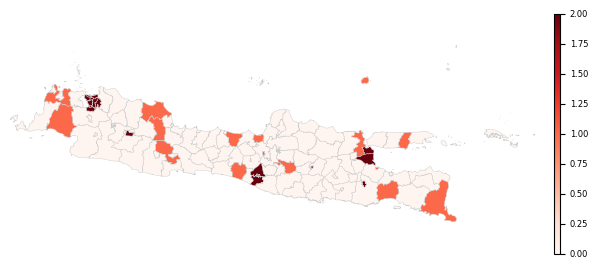

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Buat figure dan axes
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

# Set warna latar belakang figure dan axes
fig.set_facecolor("#ffffff")
fig.patch.set_facecolor("#ffffff")
ax.margins(0)
ax.apply_aspect()

# Plot data
merged.plot(column=variabel, cmap='Reds', linewidth=0.3, ax=ax, edgecolor='0.8')

# Menambahkan colorbar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(norm=norm, cmap='Reds')
sm._A = []  # Menginisialisasi mappable

cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Menampilkan plot
plt.show()

## Means Shift

### Visualization

<Axes: >

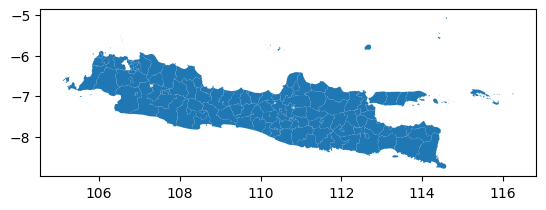

In [39]:
merged_ms = map_df_jawa_fix.set_index('Kabupaten/Kota').join(df_kluster_ms.set_index('Kabupaten/Kota'))
merged_ms.dropna().plot()

In [40]:
merged_ms

,Shape_Leng,Shape_Area,ADM2_PCODE,ADM1_EN,ADM1_PCODE,geometry,UHH (tahun),HLS (tahun),RLS (tahun),Pengeluaran (ribu rupiah),Label Cluster
Kabupaten/Kota,,,,,,,,,,,
Bandung,3.093005,0.143607,ID3204,Jawa Barat,ID32,"POLYGON ((107.73309 -6.81400, 107.73354 -6.814...",74.92,12.73,9.10,11018.0,0.0
Bandung Barat,3.027563,0.104476,ID3217,Jawa Barat,ID32,"POLYGON ((107.40945 -6.68851, 107.40986 -6.688...",74.78,11.91,8.23,9392.0,0.0
Bangkalan,1.902703,0.106667,ID3526,Jawa Timur,ID35,"POLYGON ((113.03600 -6.87967, 113.03668 -6.879...",73.29,11.97,5.99,9438.0,0.0
Banjarnegara,2.326238,0.094114,ID3304,Jawa Tengah,ID33,"POLYGON ((109.80041 -7.17174, 109.80093 -7.172...",74.50,11.82,6.86,10226.0,0.0
Bantul,1.832076,0.042281,ID3402,Daerah Istimewa Yogyakarta,ID34,"POLYGON ((110.35102 -7.78036, 110.35094 -7.780...",74.64,15.61,9.79,16524.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Tulungagung,2.313531,0.094379,ID3504,Jawa Timur,ID35,"MULTIPOLYGON (((111.86394 -8.27903, 111.86379 ...",74.99,13.34,8.66,11565.0,0.0
Waduk Cirata,1.542493,0.004693,ID3288,Jawa Barat,ID32,"POLYGON ((107.36784 -6.70070, 107.36693 -6.700...",NaN,NaN,NaN,NaN,NaN
Wadung Kedungombo,1.950834,0.002435,ID3388,Jawa Tengah,ID33,"POLYGON ((110.82794 -7.24749, 110.82806 -7.247...",NaN,NaN,NaN,NaN,NaN


In [41]:
merged_ms.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_PCODE',
       'geometry', 'UHH (tahun)', 'HLS (tahun)', 'RLS (tahun)',
       'Pengeluaran (ribu rupiah)', 'Label Cluster'],
      dtype='object')

In [42]:
variabel = 'Label Cluster'
vmin = merged_ms['Label Cluster'].min()
vmax = merged_ms['Label Cluster'].max()

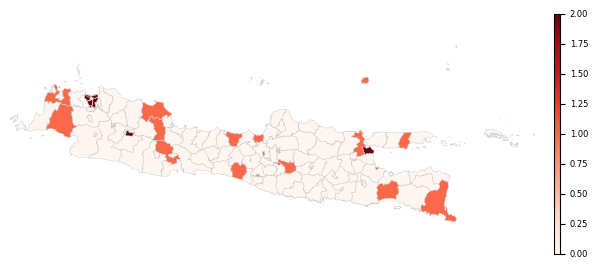

In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Buat figure dan axes
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

# Set warna latar belakang figure dan axes
fig.set_facecolor("#ffffff")
fig.patch.set_facecolor("#ffffff")
ax.margins(0)
ax.apply_aspect()

# Plot data
merged_ms.plot(column=variabel, cmap='Reds', linewidth=0.3, ax=ax, edgecolor='0.8')

# Menambahkan colorbar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(norm=norm, cmap='Reds')
sm._A = []  # Menginisialisasi mappable

cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Menampilkan plot
plt.show()